<a href="https://colab.research.google.com/github/YEmreSancak/Classification-Exercise/blob/main/CMPE460_Worksheet_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](approximator.JPG)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras import layers

np.random.seed(7)

# Helpers

In [ ]:
def draw_losses(history):
  plt.figure(figsize=(12.5,5))

  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(loss_values) + 1)
  plt.subplot(1,2,1)
  plt.plot(epochs, loss_values, 'g')
  plt.title('Training loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.subplot(1,2,2)
  plt.plot(epochs, val_loss_values, 'b')
  plt.title('Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def scale(y):
    y = (y - np.min(y))/(np.max(y)- np.min(y))
    return y

def sin(x): 
    return scale(np.sin(x))

# Generate 2D Data

In [ ]:
n = 1000
 
x = np.linspace(-30, 30, n)
y = sin(x)

X1 = np.random.randint(low=-30,high=30,size=1000)
X2 = np.random.rand(1000)

Y = (1*(sin(X1)>X2))
Y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

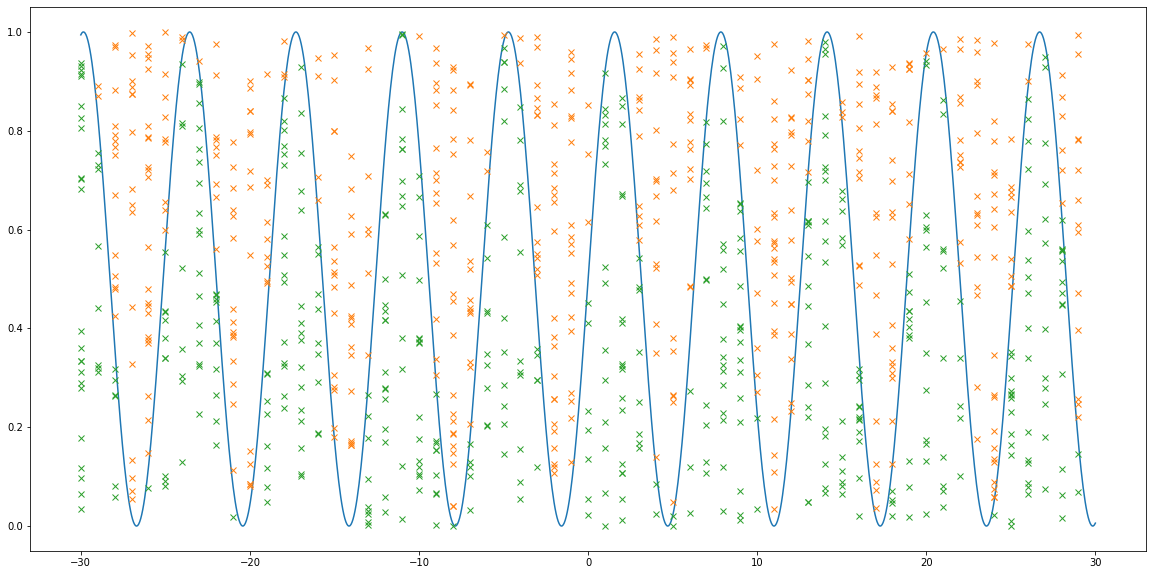

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(x, y)
plt.plot(X1[X2 > sin(X1)], X2[X2 > sin(X1)], 'x')
plt.plot(X1[X2 < sin(X1)], X2[X2 < sin(X1)], 'x')

## Train & Split dataset

In [ ]:
X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
Y = Y.reshape(-1,1)
data = np.concatenate((X1, X2, Y), axis = 1)
X = data[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create & Build Model

In [ ]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Draw the losses during training

In [ ]:
optimizer = 'rmsprop'
loss= 'binary_crossentropy'
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])


Train on 603 samples, validate on 67 samples
Epoch 1/600
603/603 [==============================] - 0s 571us/step - loss: 0.5632 - acc: 0.6932 - val_loss: 0.5354 - val_acc: 0.7015
Epoch 2/600
603/603 [==============================] - 0s 11us/step - loss: 0.5470 - acc: 0.7098 - val_loss: 0.5350 - val_acc: 0.7015
Epoch 3/600
603/603 [==============================] - 0s 11us/step - loss: 0.5603 - acc: 0.6750 - val_loss: 0.5368 - val_acc: 0.7164
Epoch 4/600
603/603 [==============================] - 0s 10us/step - loss: 0.5452 - acc: 0.7098 - val_loss: 0.5224 - val_acc: 0.7015
Epoch 5/600
603/603 [==============================] - 0s 17us/step - loss: 0.5547 - acc: 0.6899 - val_loss: 0.5727 - val_acc: 0.6567
Epoch 6/600
603/603 [==============================] - 0s 17us/step - loss: 0.5541 - acc: 0.6816 - val_loss: 0.5750 - val_acc: 0.6567
Epoch 7/600
603/603 [==============================] - 0s 12us/step - loss: 0.5638 - acc: 0.6799 - val_loss: 0.5247 - val_acc: 0.7313
Epoch 8/600
603/

No handles with labels found to put in legend.


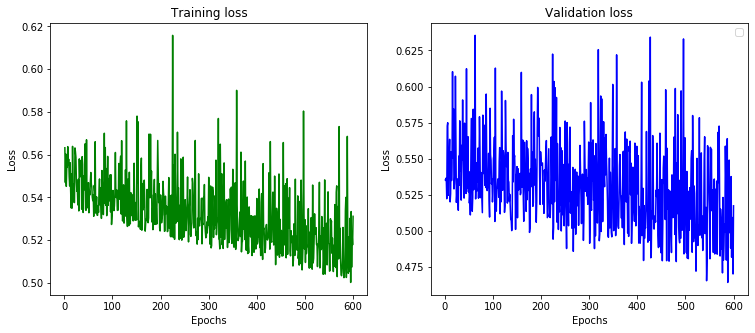

In [ ]:
history= model.fit(X_train,
                   y_train,
                   epochs=600,
                   batch_size=512,
                   validation_data=(X_valid,y_valid))
draw_losses(history)

## Evaluate the model

In [ ]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

330/330 [==============================] - 0s 58us/step
acc: 75.15%


## Draw the confussion matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = 1 * (model.predict(X_test) > 0.5)
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print('Accuracy on Test Data:{:.3}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[115  59]
 [ 23 133]]
Accuracy on Test Data:0.752


In [ ]:
hyperparam={}